In [ ]:
!apt-get install -y tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (10.6 MB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 123620 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-e

In [ ]:
import cv2          # For image processing
import numpy as np   # Used for numerical operations on image arrays
import pytesseract   # For Optical Character Recognition (OCR)
from google.colab.patches import cv2_imshow  # To display images in Colab
from google.colab import files  # To handle file uploads in Colab
import os           # For file path operations

# from google.colab import drive
# drive.mount('/content/drive') # Connect to the Drive

In [ ]:
def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    denoised = cv2.fastNlMeansDenoising(gray)       # Remove noise
    thresh = cv2.threshold(denoised, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]  # Binary thresholding
    return thresh

In [ ]:
def detect_text_regions(image):
    # Detecting words
    boxes = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT)  # Get text region data
    return boxes

In [ ]:
def draw_bounding_boxes(image, boxes):
    output = image.copy()  # Copy original image to draw boxes
    n_boxes = len(boxes['level'])  # Total number of detected text regions
    for i in range(n_boxes):
        if int(boxes['conf'][i]) > 60:  # Only consider boxes with confidence > 60%
            (x, y, w, h) = (boxes['left'][i], boxes['top'][i], boxes['width'][i], boxes['height'][i])  # Box coordinates
            cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw rectangle on the image
    return output


In [ ]:
def get_detected_text(boxes):
    detected_text = []
    n_boxes = len(boxes['level'])  # Total number of detected boxes
    for i in range(n_boxes):
        if int(boxes['conf'][i]) > 60:  # Only extract text with confidence > 60%
            detected_text.append(boxes['text'][i])  # Append detected text
    return ' '.join(detected_text)  # Combine text into a single string


In [ ]:
image_path = "/content/1680269551304.jpg"

image = cv2.imread(image_path)  # Read the image


Original Image:


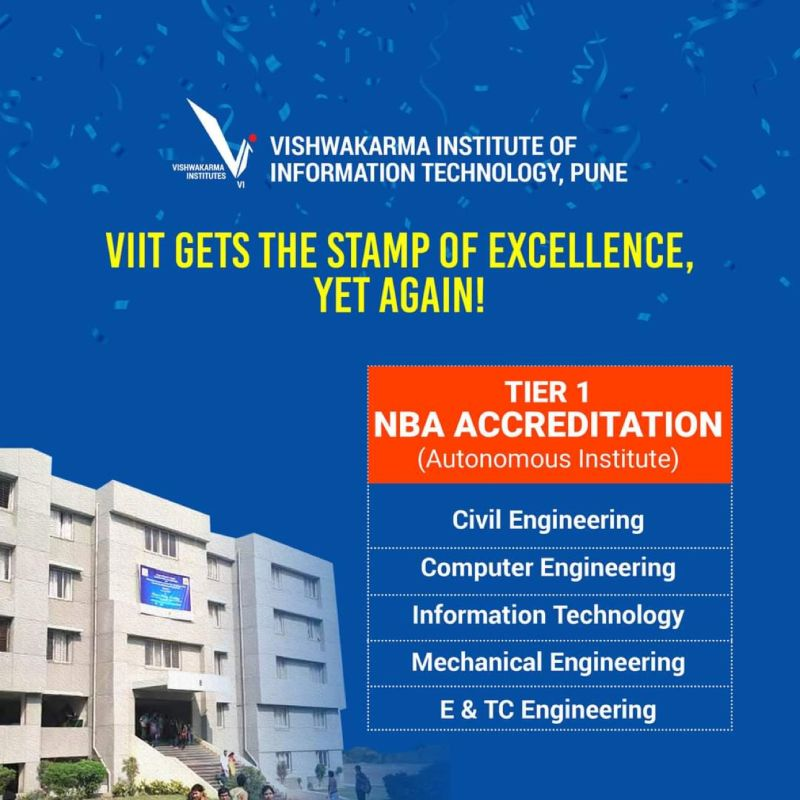


Image with Text Detection Regions:


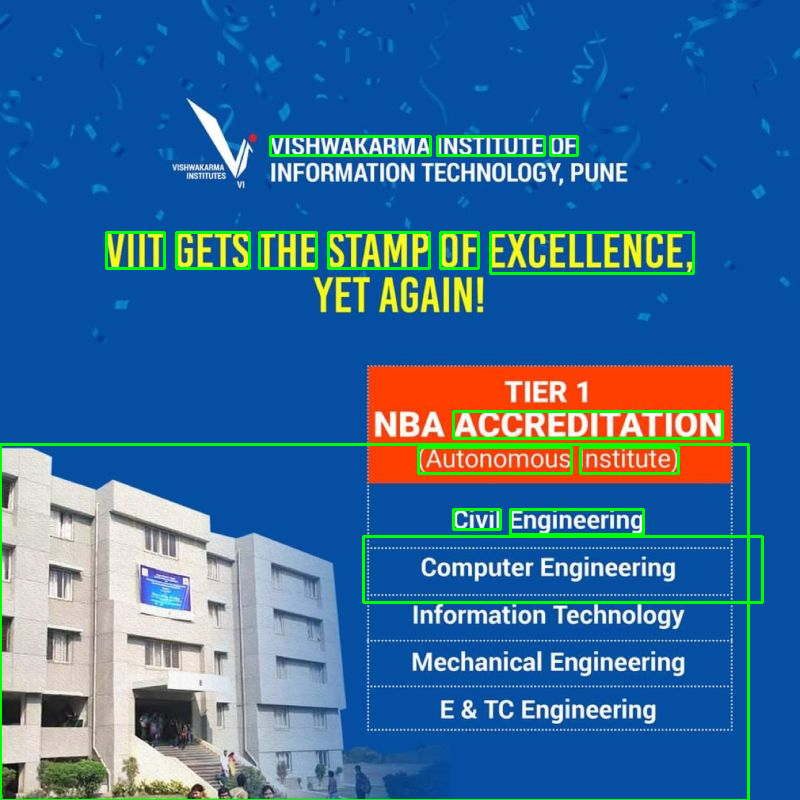


Detected Text:
VISHWAKARMA INSTITUTE OF VIIT GETS THE STAMP OF EXCELLENCE, ACCREDITATION (Autonomous Institute) Civil Engineering   


In [ ]:
# Check if image was successfully read
if image is None:
    print(f"Error: Unable to read the image file: {image_path}")
else:
    # Display original image
    print("\nOriginal Image:")
    cv2_imshow(image)

    # Preprocess the image and detect text regions
    preprocessed = preprocess_image(image)  # Preprocessing
    boxes = detect_text_regions(preprocessed)  # Detect text regions

    # Draw bounding boxes on original image
    image_with_boxes = draw_bounding_boxes(image, boxes)

    # Display the image with bounding boxes
    print("\nImage with Text Detection Regions:")
    cv2_imshow(image_with_boxes)

    # Extract and print the detected text
    detected_text = get_detected_text(boxes)
    print("\nDetected Text:")
    print(detected_text)